In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [ ]:
pip install sklearn

In [ ]:
pip install seaborn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
data_telco = pd.read_csv('TelcoCustomerChurn.csv')

In [6]:
df2 = data_telco.copy()

In [7]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df2.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
sumnum = df2.describe()

sumnum

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
sumcate = df2.describe(include='O')

sumcate

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [12]:
df2['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [13]:
df2['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [14]:
np.unique(df2['PaymentMethod'])

array(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [15]:
correlation = df2.corr()

correlation

C:\Users\Hazim\AppData\Local\Temp\ipykernel_30592\2288925638.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df2.corr()


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [16]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [94]:
# Mengganti nilai "Yes" dan "No" menjadi 1 dan 0 
# df2['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

# Menampilkan 5 baris teratas 
# print(df2.head())

In [95]:
# Mengganti nilai "Female" dan "Male" menjadi 1 dan 0 
#df2['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

# Menampilkan 5 baris teratas 
# print(df2.head())

In [17]:
gender = pd.crosstab(index = df2['Contract'],
                    columns = 'count',
                     normalize=True
                    )

gender

col_0,count
Contract,
Month-to-month,0.550192
One year,0.209144
Two year,0.240664


In [18]:
contract_churn = pd.crosstab(index= df2['Contract'],
                            columns = df2['Churn'],
                             margins = True,
                             normalize = 'index'
                            )

contract_churn

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319
All,0.734630,0.265370


#### frequency distribution of contract

<Axes: xlabel='Churn', ylabel='count'>

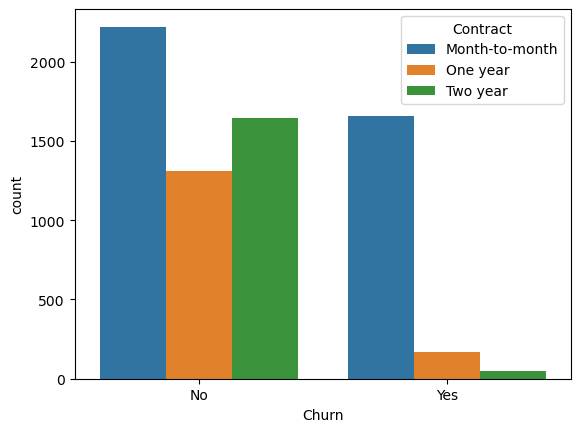

In [19]:

df_gc = df2[['Contract', 'Churn']]

sns.countplot(x='Churn', hue='Contract', data=df_gc)

C:\Users\Hazim\AppData\Local\Temp\ipykernel_30592\1064718999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['MonthlyCharges'], bins=5, kde=False)


<Axes: xlabel='MonthlyCharges'>

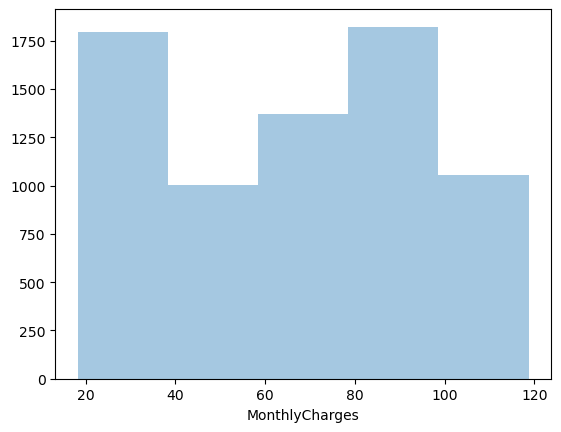

In [20]:
sns.distplot(df2['MonthlyCharges'], bins=5, kde=False)

C:\Users\Hazim\AppData\Local\Temp\ipykernel_30592\4123537728.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['tenure'], bins=10, kde=False)


<Axes: xlabel='tenure'>

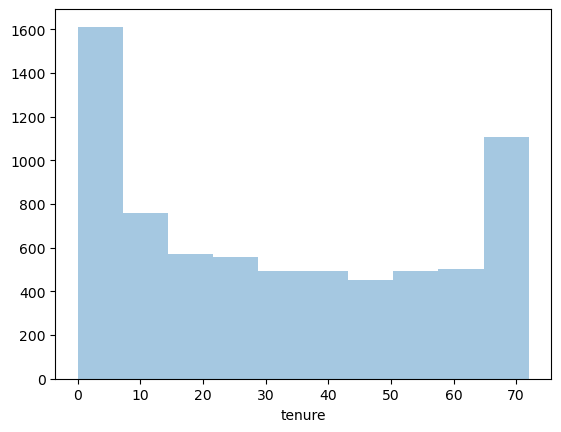

In [21]:
sns.distplot(df2['tenure'], bins=10, kde=False)

### Bivariate analysis for 

Churn
No     64.425
Yes    79.650
Name: MonthlyCharges, dtype: float64


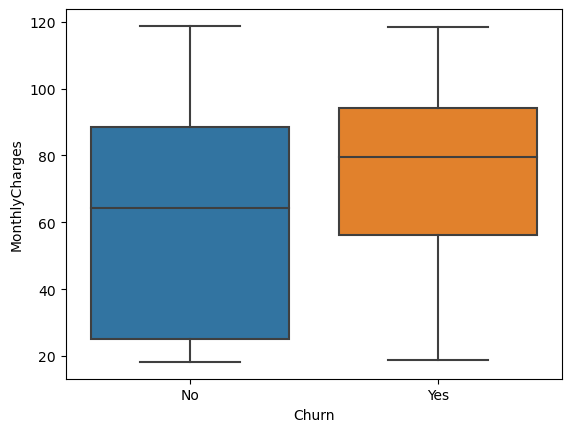

In [28]:
df_cc = df2[['Churn', 'MonthlyCharges']]

sns.boxplot(x='Churn', y='MonthlyCharges', data=df_cc)

print(df2.groupby('Churn')['MonthlyCharges'].median())